In [3]:
import json
import urllib.request as ur
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import lmfit
import scipy.stats as sts
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import chi2

from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick

from IPython.display import display, Markdown

In [4]:
def gompertz_function(x, a, b, k, e):
    exp = - np.exp(k * (b - x))
    return a * np.exp(exp) + e

def double_gompertz_function(x, a1, b1, k1, a2, b2, k2, e):
    exp1 = - np.exp(k1 * (b1 - x))
    g1 = a1 * np.exp(exp1)
    exp2 = - np.exp(k2 * (b2 - x))
    g2 = (a2 - a1) * np.exp(exp2)
    return g1 + g2 + e

def logit_function(x, a, b, k, e):
    d = k * (b - np.array(x))
    return (a / (1 + np.exp(d))) + e

def double_logit_function(x, a1, b1, k1, a2, b2, k2, e):
    d1 = k1 * (b1 - np.array(x))
    l1 = a1 / (1 + np.exp(d1))
    d2 = k2 * (b2 - np.array(x))
    l2 = (a2 - a1) / (1 + np.exp(d2))
    return l1 + l2 + e

In [30]:
df = pd.read_pickle("data-confirmed-2020-05-01.pkl")

In [33]:
df["Gompertz Function"]["Korea, South"].best_fit.size

100

In [20]:
df["Gompertz Function"]["Korea, South"].init_vals

[10761, 97, 0.1, 1]

In [21]:
df["Gompertz Function"]["Korea, South"].params

name,value,standard error,relative error,initial value,min,max,vary
a,10444.0853,106.759038,(1.02%),10761,-inf,inf,True
b,39.2940367,0.24426290,(0.62%),97,-inf,inf,True
k,0.11686381,0.00490183,(4.19%),0.1,-inf,inf,True
e,-55.6109996,67.2967223,(121.01%),1,-inf,inf,True


In [12]:
colors = ["b", "y", "r", "g"]

In [49]:
def plot_country(country, guessed=False):
    x = np.arange(0, df["measured"][country].size)

    fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

    i = 0
    for f in df.columns:
        if f == "measured":
            continue
        ax.flat[i].scatter(
            x,
            df["measured"][country],
            s=3, c="grey", label="measured"
        )
        ax.flat[i].plot(
            x,
            df[f][country].best_fit,
            label=f, c=colors[i]
        )
        if guessed:
            if f == "Gompertz Function":
                ax.flat[i].plot(
                    x,
                    gompertz_function(x, *df[f][country].init_vals),
                    label="guessed", c=colors[i],
                    ls=":"
                )
            if f == "Logit Function":
                ax.flat[i].plot(
                    x,
                    logit_function(x, *df[f][country].init_vals),
                    label="guessed", c=colors[i],
                    ls=":"
                )
            if f == "Double Gompertz Function":
                ax.flat[i].plot(
                    x,
                    double_gompertz_function(x, *df[f][country].init_vals),
                    label="guessed", c=colors[i],
                    ls=":"
                )
            if f == "Double Logit Function":
                ax.flat[i].plot(
                    x,
                    double_logit_function(x, *df[f][country].init_vals),
                    label="guessed", c=colors[i],
                    ls=":"
                )
        ax.flat[i].legend(loc="best")
        i += 1
    plt.suptitle(country, fontsize=30)
    plt.show()

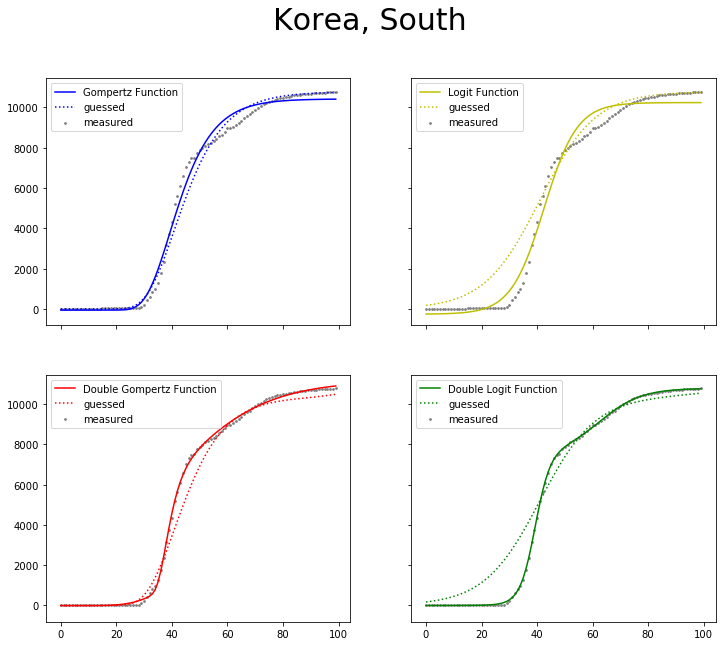

In [56]:
plot_country("Korea, South", guessed=True)

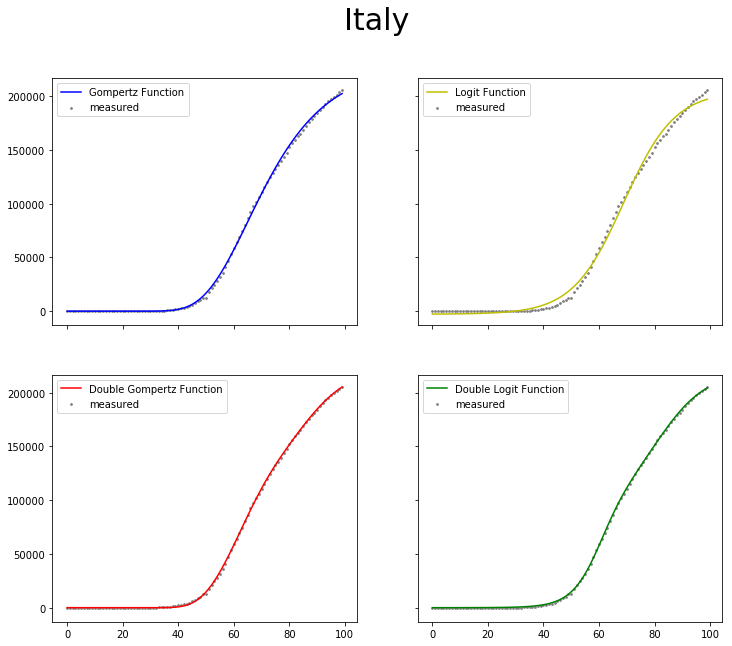

In [51]:
plot_country("Italy")

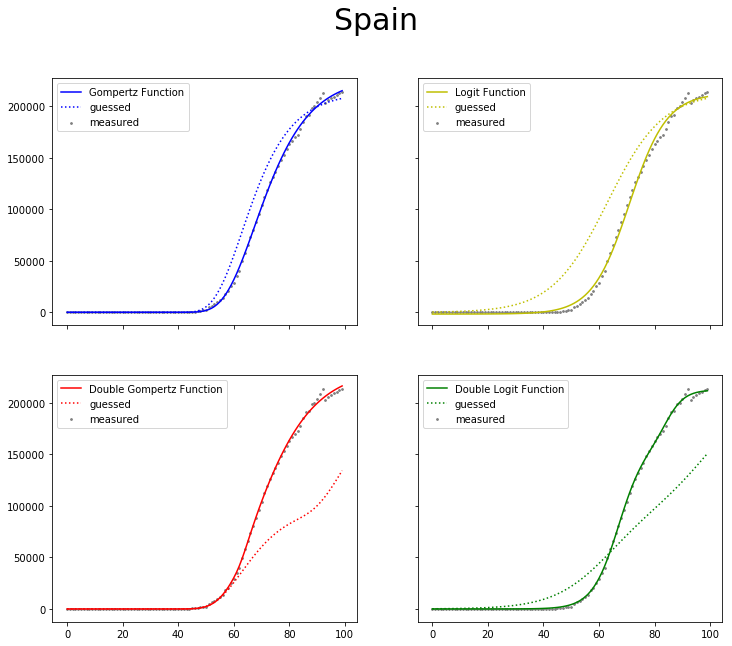

In [57]:
plot_country("Spain", True)

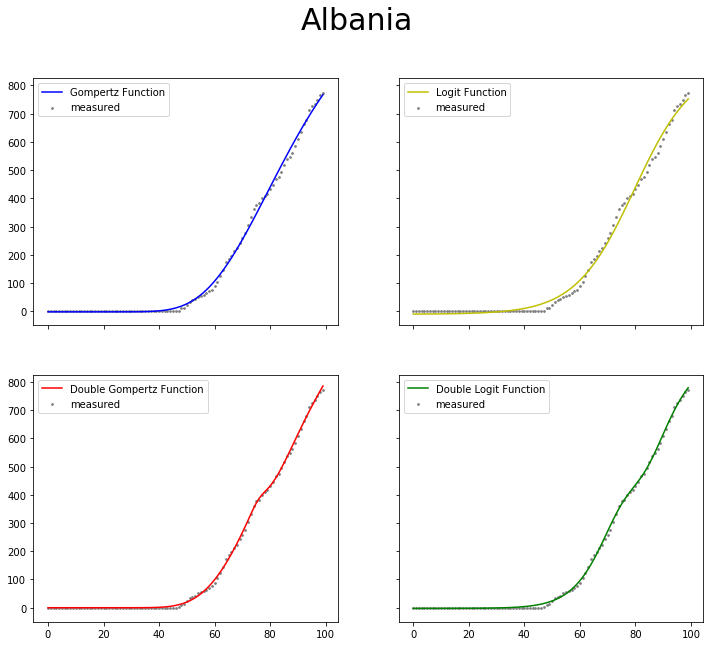

In [53]:
plot_country("Albania")

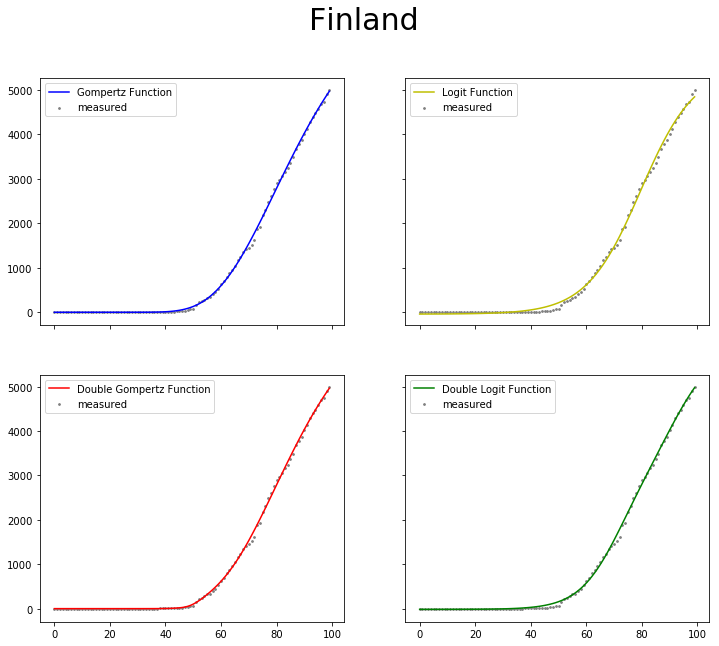

In [54]:
plot_country("Finland")

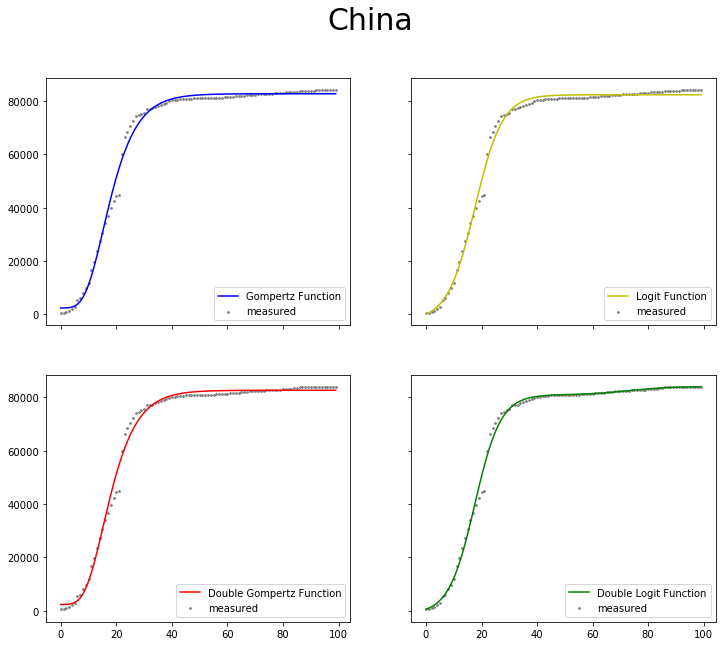

In [55]:
plot_country("China")